# **Machine Learning Algorithms**

In this notebook , I will try all the classical machine learning algorithms excluding deep learning algorithms. I am also  considering TimeStamps as Features.I will use the condensed data with little lesser features to find out the best performing algorithm. Once I find the best algorithm I will the same method to train it over original_data to see if we get better results.

Algorithms that I am planning to use are:
*     Logistic Regression
*     K-Nearest Neighbours
*     SVM
*     Naive Bayes
*     Decision Trees


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
X = pd.read_csv('/kaggle/input/meta-learning-dataset/Cond_X_Data.csv')
Y = pd.read_csv('/kaggle/input/meta-learning-dataset/Cond_Y_Data.csv')

In [3]:
X.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,246,247,248,249,250,251,252,253,254,255
0,0,-0.490073,-0.765031,-0.884406,-0.714530,-0.506901,-0.159583,0.164673,0.240538,0.108196,...,-0.166302,-0.195686,-0.152645,-0.145678,-0.150379,-0.253162,-0.315807,-0.166668,0.070144,-0.196952
1,1,-0.174277,-0.073173,-0.029551,0.033165,-0.083878,-0.053994,-0.055888,0.088213,0.191465,...,-0.478593,-0.159402,0.171805,0.471623,0.124134,-0.027419,-0.039940,-0.116103,-0.122164,-0.013566
2,2,0.001981,-0.073173,0.194727,0.246793,-0.186222,-0.208858,-0.262219,-0.238197,-0.148850,...,-0.171338,-0.159402,-0.208410,-0.205903,-0.211382,-0.092634,-0.044956,-0.090821,0.019537,0.263990
3,3,0.446299,0.116109,0.119967,1.541908,0.523365,-0.159583,-0.166168,-0.169288,-0.134369,...,-0.030303,-0.408208,-0.355427,-0.271146,1.959302,-0.408674,-0.471296,-0.379042,-0.193015,-0.073043
4,4,0.024014,-0.069909,-0.062055,-0.013566,0.059404,-0.022317,0.040163,0.033811,0.173363,...,-0.035340,-0.123118,-0.228688,-0.301258,-0.145295,0.113044,0.035296,7.893412,-0.876216,-1.039536


In [12]:
Y

,Unnamed: 0,CLASS
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
18365,18365,1
18366,18366,1
18367,18367,1
18368,18368,1


<AxesSubplot:xlabel='CLASS', ylabel='count'>

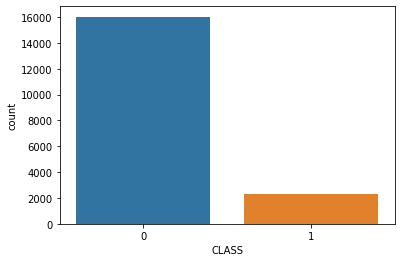

In [10]:
sns.countplot(x=Y['CLASS'])

In [11]:
Y['CLASS'].value_counts()

0    16030
1     2340
Name: CLASS, dtype: int64

**The data is unbalanced , firstly lets balance it**

In [14]:
data = X.merge(Y, on='Unnamed: 0')
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,247,248,249,250,251,252,253,254,255,CLASS
0,0,-0.490073,-0.765031,-0.884406,-0.714530,-0.506901,-0.159583,0.164673,0.240538,0.108196,...,-0.195686,-0.152645,-0.145678,-0.150379,-0.253162,-0.315807,-0.166668,0.070144,-0.196952,0
1,1,-0.174277,-0.073173,-0.029551,0.033165,-0.083878,-0.053994,-0.055888,0.088213,0.191465,...,-0.159402,0.171805,0.471623,0.124134,-0.027419,-0.039940,-0.116103,-0.122164,-0.013566,0
2,2,0.001981,-0.073173,0.194727,0.246793,-0.186222,-0.208858,-0.262219,-0.238197,-0.148850,...,-0.159402,-0.208410,-0.205903,-0.211382,-0.092634,-0.044956,-0.090821,0.019537,0.263990,0
3,3,0.446299,0.116109,0.119967,1.541908,0.523365,-0.159583,-0.166168,-0.169288,-0.134369,...,-0.408208,-0.355427,-0.271146,1.959302,-0.408674,-0.471296,-0.379042,-0.193015,-0.073043,0
4,4,0.024014,-0.069909,-0.062055,-0.013566,0.059404,-0.022317,0.040163,0.033811,0.173363,...,-0.123118,-0.228688,-0.301258,-0.145295,0.113044,0.035296,7.893412,-0.876216,-1.039536,0


In [19]:
ones = data[data['CLASS']==1].drop(['Unnamed: 0'] , axis=1)
print(ones.shape)
ones.head()

(2340, 257)


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,CLASS
16030,1.882071,0.602368,0.379999,0.246793,0.247036,0.146625,-0.095020,-0.151155,-0.217637,0.520423,...,1.219399,0.344169,-0.522081,-0.612984,-0.243129,-0.305776,-0.434664,-0.516903,-0.588506,1
16031,-0.321159,0.468565,0.659534,0.734130,0.373260,-0.053994,-0.340483,-0.452177,-0.463822,-0.407922,...,-0.045366,0.288404,0.858063,1.506864,1.286909,0.095485,-0.485229,-0.572571,-0.434858,1
16032,-0.012707,-0.079700,-0.026301,-0.006890,0.110577,0.167743,0.164673,0.062825,4.416437,0.248447,...,-0.366741,-0.294592,0.090201,0.973090,1.377206,1.334379,0.384491,-0.334716,-0.385295,1
16033,-0.714068,-0.024220,-0.120562,-0.437482,-0.442083,-0.409477,-0.176841,-0.122140,-0.043859,0.103393,...,0.898024,0.648341,0.280912,0.154635,0.153176,0.055359,0.237853,0.307999,0.239209,1
16034,0.240665,0.122636,0.217479,0.083234,-0.274920,-0.377801,-0.344040,-0.357881,-0.355211,-0.328142,...,0.286376,-0.010698,-0.316314,-0.343555,-0.388608,-0.546532,-0.399268,4.341418,-0.647982,1


In [20]:
zeros = data[data['CLASS']==0].sample(n=2340).drop(['Unnamed: 0'] , axis=1)
print(zeros.shape)
zeros.head()

(2340, 257)


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,CLASS
12339,0.321450,-0.314670,0.051709,0.126627,1.594569,-0.976139,0.047277,0.026558,-0.014897,0.204931,...,0.203440,0.790288,0.948400,0.596906,-0.253162,-0.401075,-0.399268,-0.375202,-0.400164,0
15275,-0.199981,0.103055,1.182848,1.021191,-0.138461,-0.015278,0.050835,0.128107,0.155261,0.357237,...,-0.403025,-0.046185,2.930788,-1.014586,-0.564186,-0.551548,-0.515568,-0.294230,-0.053217,0
14168,-0.284439,-0.011167,0.136219,0.246793,0.530188,0.611218,0.239379,0.062825,0.035789,0.027240,...,-0.071283,-0.010698,0.260837,0.673159,0.970868,0.968228,0.642374,0.444640,0.412682,0
7702,-0.034739,0.853656,0.662784,0.527178,0.274327,0.026958,-0.297793,-0.386895,-0.177813,-0.393417,...,0.001285,-0.188132,0.019939,0.251223,0.228424,-0.095114,2.700374,-0.542207,0.110343,0
4361,-0.042083,-0.027484,-0.175819,-0.046945,-0.083878,-0.219417,-0.063003,-0.024217,-0.076443,-0.092430,...,-0.257888,-0.269245,-0.205903,-0.058875,-0.383592,0.075422,-0.121160,-0.187954,-0.271298,0


In [22]:
data = zeros.append(ones , ignore_index=True)
print(data.shape)
data.head()

(4680, 257)


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,CLASS
0,0.321450,-0.314670,0.051709,0.126627,1.594569,-0.976139,0.047277,0.026558,-0.014897,0.204931,...,0.203440,0.790288,0.948400,0.596906,-0.253162,-0.401075,-0.399268,-0.375202,-0.400164,0
1,-0.199981,0.103055,1.182848,1.021191,-0.138461,-0.015278,0.050835,0.128107,0.155261,0.357237,...,-0.403025,-0.046185,2.930788,-1.014586,-0.564186,-0.551548,-0.515568,-0.294230,-0.053217,0
2,-0.284439,-0.011167,0.136219,0.246793,0.530188,0.611218,0.239379,0.062825,0.035789,0.027240,...,-0.071283,-0.010698,0.260837,0.673159,0.970868,0.968228,0.642374,0.444640,0.412682,0
3,-0.034739,0.853656,0.662784,0.527178,0.274327,0.026958,-0.297793,-0.386895,-0.177813,-0.393417,...,0.001285,-0.188132,0.019939,0.251223,0.228424,-0.095114,2.700374,-0.542207,0.110343,0
4,-0.042083,-0.027484,-0.175819,-0.046945,-0.083878,-0.219417,-0.063003,-0.024217,-0.076443,-0.092430,...,-0.257888,-0.269245,-0.205903,-0.058875,-0.383592,0.075422,-0.121160,-0.187954,-0.271298,0


In [23]:
Y = data['CLASS']
X = data.drop('CLASS', axis = 1)


In [24]:
print(X.shape)
print(Y.shape)
print(Y.head())
X.head()

(4680, 256)
(4680,)
0    0
1    0
2    0
3    0
4    0
Name: CLASS, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.321450,-0.314670,0.051709,0.126627,1.594569,-0.976139,0.047277,0.026558,-0.014897,0.204931,...,-0.080673,0.203440,0.790288,0.948400,0.596906,-0.253162,-0.401075,-0.399268,-0.375202,-0.400164
1,-0.199981,0.103055,1.182848,1.021191,-0.138461,-0.015278,0.050835,0.128107,0.155261,0.357237,...,-0.246893,-0.403025,-0.046185,2.930788,-1.014586,-0.564186,-0.551548,-0.515568,-0.294230,-0.053217
2,-0.284439,-0.011167,0.136219,0.246793,0.530188,0.611218,0.239379,0.062825,0.035789,0.027240,...,-0.090747,-0.071283,-0.010698,0.260837,0.673159,0.970868,0.968228,0.642374,0.444640,0.412682
3,-0.034739,0.853656,0.662784,0.527178,0.274327,0.026958,-0.297793,-0.386895,-0.177813,-0.393417,...,-0.080673,0.001285,-0.188132,0.019939,0.251223,0.228424,-0.095114,2.700374,-0.542207,0.110343
4,-0.042083,-0.027484,-0.175819,-0.046945,-0.083878,-0.219417,-0.063003,-0.024217,-0.076443,-0.092430,...,-0.080673,-0.257888,-0.269245,-0.205903,-0.058875,-0.383592,0.075422,-0.121160,-0.187954,-0.271298


Unfortunately , We only have 4680 samples that we can use for training.

In [25]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.15)

# **Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
print (acc_lr)

[[168 200]
 [150 184]]
0.5014245014245015


50% accuracy from simple logistic regression , 351 (true positves + true negatives) and 351 false predictions. Even using regularization parameter lambda didn't improve the results.

#  K-Nearest Neighbours 

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print (cm_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
print (acc_knn)

[[328  40]
 [258  76]]
0.5754985754985755


K-NN gives a good accuracy of 57.5%. The optimal neighbours to be considered are 10 since it gives the greatest accuracy

# Support Vector Machine

In [52]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')#non linear kernel
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print (cm_svm)
acc_svm = accuracy_score(y_test, y_pred_svm)
print (acc_svm)

[[179 189]
 [118 216]]
0.5626780626780626


SVM gives a decent accuracy of 56.26% when the kernal is non-linear ('rbf') , while it is much lesser when the kernal is linear(around 50%)

# Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)
acc_nb = accuracy_score(y_test, y_pred_nb)
print(acc_nb)

[[ 82 286]
 [ 65 269]]
0.5


The simple and minimal naive bayes algorithm gives an accuracy of 50%. Not bad for the computational time it takes.

# Decision Trees

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print (cm_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
print (acc_dt)

[[211 157]
 [165 169]]
0.5413105413105413


**54% accuracy** from the decision trees.

# Ensemble Modelling

In [54]:
y_pred_em = (0.16*y_pred_lr) + (0.23*y_pred_knn) + (0.23*y_pred_svm) + (0.16*y_pred_nb) + (0.22*y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print (cm_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
print (acc_dt)

[[211 157]
 [165 169]]
0.5413105413105413


# Conclusion

We could still try optimize the weights of ensemble modelling, but since all our model performances are around 50-55% , the best we could get through ensembling would be 58-60%. So I am stopping it here , since the deep learning algorithms are certainly gonna do well than these algorithms